In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

# Dictionary to store the loaded arrays
L = 4
N = L*L
periodic = False
model = "2DRyberg"

if model == "2DXXZ":
    int_ = "delta"
    params = [1.2, 1.05, 1., 0.95, 0.8, 0.2,-0.2, -0.8, -0.95, -1.0, -1.05, -1.2]  #sigmaz interaction
elif model == "2DJ1J2":
    int_ = "J2"
    params = [0.2, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.8, 1.0, 1.05, 1.2] #J2
elif model == "2DTFIM":
    int_ = "B"
    params =  [0, -0.5, -1.0, -1.2, -1.4, -1.6, -1.8, -2.0, -2.5, -4.0] #magnetic field
elif model == "2DRyberg":
    int_ = "delta"
    params = [ 0.0, 0.4, 0.8, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.8, 3.2, 3.6]
cmi = {}
mean_corr= {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}
stagger_mag = {}
# Looping through the values and loading each file
for param in params:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi[param] = np.load(filename)
    cmi[param] = cmi[param][cmi[param]>1e-13]
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mean_corr[param] = np.load(filename)
    filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    var_corr[param] = np.load(filename)
    var_corr[param] = var_corr[param][mean_corr[param]>1e-13]
    mean_corr[param] = mean_corr[param][mean_corr[param]>1e-13]

    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    gap[param] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi_traceout[param] = np.load(filename, allow_pickle=True)
    for j in range(len(cmi_traceout[param])):
        cmi_traceout[param][j] = np.array(cmi_traceout[param][j])[np.array(cmi_traceout[param][j])>1e-13]
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mag[param] = np.load(filename)
    filename = f"result/{model}/stagger_mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    stagger_mag[param] = np.load(filename)

In [8]:
print(cmi_traceout)

{0.0: array([array([4.64620525e-02, 4.17743755e-04, 1.16120999e-05, 1.21114874e-07,
              2.18827001e-08, 2.69747780e-10])                               ,
       array([2.35684246e-02, 5.55098265e-04, 9.01377676e-06, 2.34465672e-07,
              1.05962439e-08])                                               ,
       array([3.27472269e-02, 2.23781039e-04, 2.43762697e-05, 2.38581511e-07,
              3.07514512e-08])                                               ,
       array([2.34761506e-02, 1.37023237e-04, 1.12613126e-05, 2.37183704e-06,
              6.61128867e-08, 1.94306082e-09])                               ,
       array([2.33282087e-02, 3.14882396e-04, 2.85520430e-06, 4.47777748e-08,
              1.17599281e-08])                                               ,
       array([1.40296390e-02, 2.29532018e-04, 3.82801332e-06, 3.32989964e-08]),
       array([1.66281248e-02, 2.57365905e-04, 2.41170112e-06, 1.47707313e-08]),
       array([1.36342499e-02, 1.24075740e-04, 2.2

In [4]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range (len(params))]
err_cmi_length_traceout = [[] for i in range (len(params))]
for i in params:
    df = len(cmi[i])-2
    if df>=1:
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x)**2))
        cmi_length.append(1/cmi_len)
        err_cmi_length.append(1/cmi_len**2*err)

    df = len(mean_corr[i])-2
    if df >=1:
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(np.abs(mean_corr[i])), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x)**2))
        corre_length.append(1/corr_len)
        err_corre_length.append(1/corr_len**2*err)

    for j in range(len(cmi_traceout[i])):
        df = len(cmi_traceout[i][j])-2
        if df>=1:
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])), -np.log(cmi_traceout[i][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x)**2))
            cmi_length_traceout[params.index(i)].append(1/cmi_len)
            err_cmi_length_traceout[params.index(i)].append(1/cmi_len**2*err)




In [10]:
print(err_corre_length)
print(corre_length)

[array([0.06970548]), array([0.16080197]), array([0.44692095]), array([2.53429585]), array([20.03796053]), array([38.04698219]), array([6.156805]), array([6.10801613]), array([6.97799858]), array([7.86874952]), array([9.3945063]), array([10.74358808]), array([12.37895615])]
[0.8567699786293511, 1.363198250027095, 2.517182439499988, 7.754341148685678, 28.325397910775738, -56.297507127505376, -24.35643108860219, -19.796985011893927, -18.350500840629866, -17.776423468453935, -17.475523395038564, -17.683017760615297, -18.37442877498968]


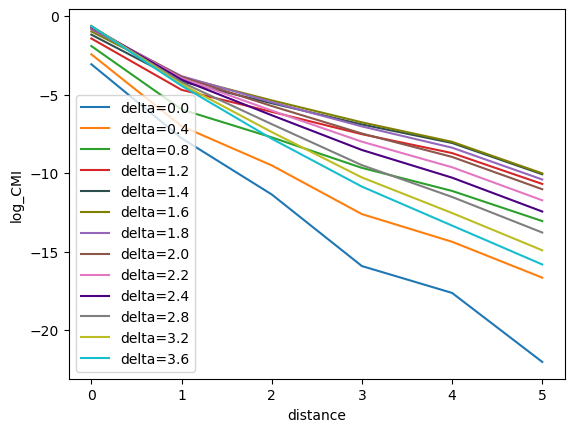

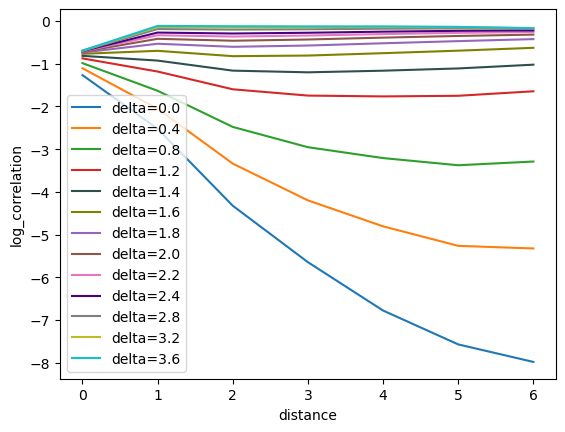

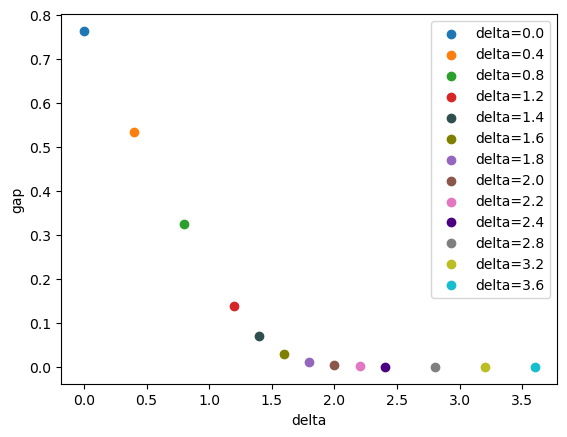

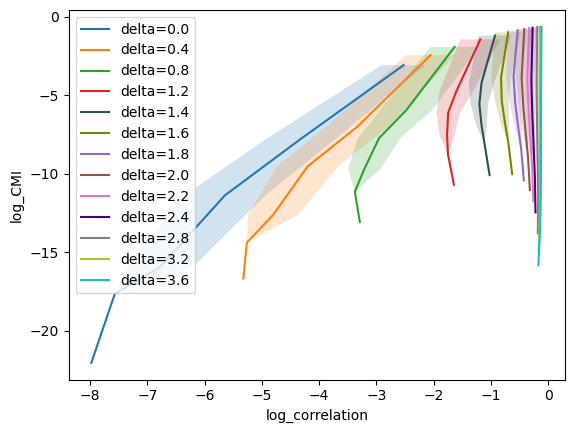

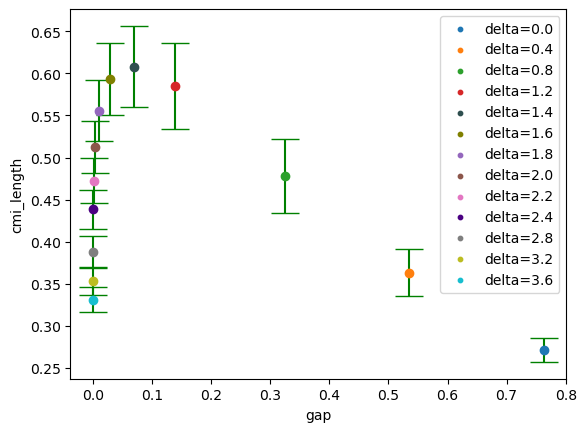

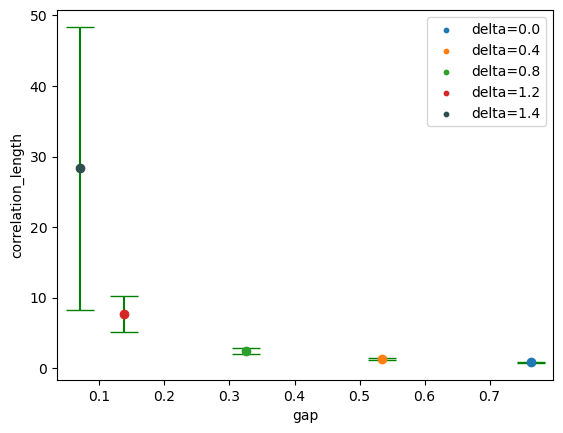

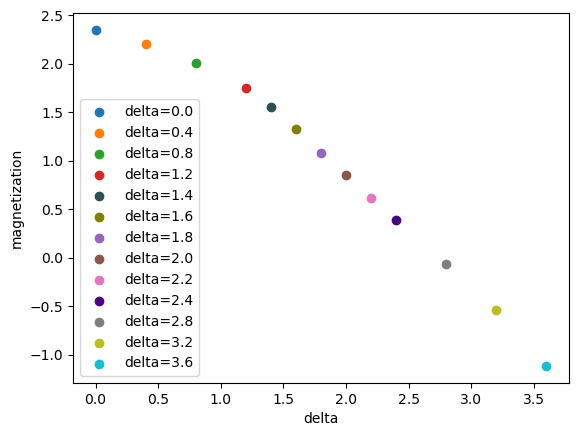

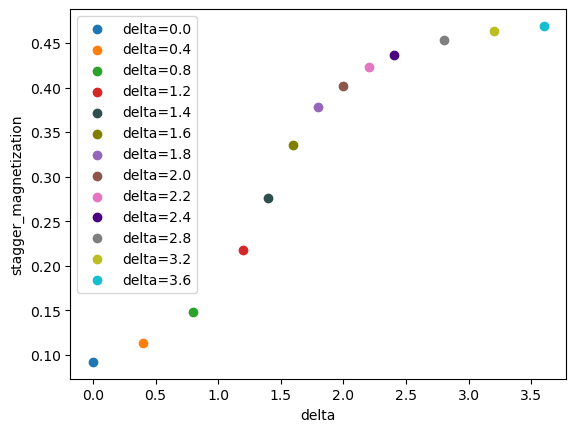

In [11]:
for i in params:
    if len(cmi[i]>=3):  #so that meaningful error can be got
        plt.plot(np.log(cmi[i]), label= int_+"="+str(i))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    if len(mean_corr[i]>=3):  #so that meaningful error can be got
        plt.plot(np.log(np.abs(mean_corr[i])), label=int_+"="+str(i))
    #plt.fill_between(np.arange(len(mean_corr[i])) ,np.log(np.abs(mean_corr[i])) - 1/mean_corr[i]*np.sqrt(var_corr[i]) , np.log(np.abs(mean_corr[i])) + 1/np.abs(mean_corr[i])*np.sqrt(var_corr[i]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig("figure/"+model+"/correlation_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.scatter(i, gap[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    length = min(len(cmi[i]), len(mean_corr[i]))
    mean_corr[i] = np.abs(mean_corr[i])
    plt.plot(np.log(mean_corr[i][1:length+1]), np.log(cmi[i][:length]), label= int_ + "=" + str(i))
    if periodic == False:
        plt.fill_betweenx(np.log(cmi[i][:length]),
                          np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
                          np.log(mean_corr[i][1:length+1]) + 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/correlation_cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()


gap_list = []
for i in params:
    if len(cmi[i])>=3:
        gap_list.append(gap[i])
for i,j in zip(params, range(len(gap_list))):
    plt.scatter(gap_list[j], cmi_length[j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], cmi_length[j], yerr=err_cmi_length[j][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig(
    "figure/"+model+"/cmi_length_gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in params:
    if len(mean_corr[i])>=3 and corre_length[params.index(i)]>0 and corre_length[params.index(i)]<100:
        gap_list.append(gap[i])
for i,j in zip(params, range(len(gap_list))):
    plt.scatter(gap_list[j], np.array(corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100)][j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], np.array(corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100) ][j], yerr=np.array(err_corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100), 0][j], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L" + str(L) +  "_"+ "periodic_" + str(
    periodic) + ".png")
plt.show()
plt.clf()

for i in params:
    mag[i] = np.abs(mag[i])
    plt.scatter(i, np.log(mag[i]), label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    stagger_mag[i] = stagger_mag[i]
    plt.scatter(i, stagger_mag[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("stagger_magnetization")
plt.legend()
plt.savefig("figure/"+model+"/stagger_mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()
    

0
[0.27141057891911546, 0.2702744417329868, 0.2890132009578097, 0.3301778071307473, 0.2641366276933593, 0.2328442511983998, 0.21518314215258375, 0.2862430077843141]


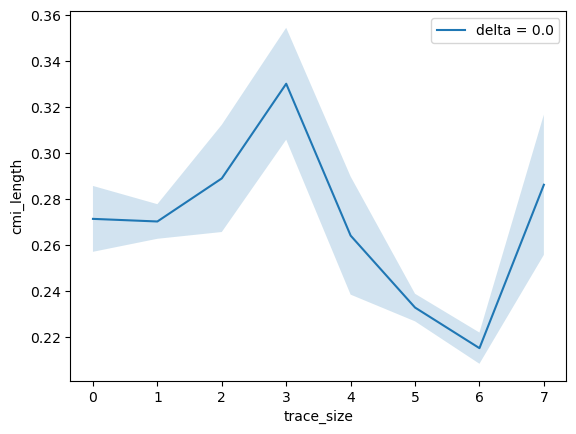

1
[0.3632413430633086, 0.33057828326749544, 0.3761966699454699, 0.4509691245928771, 0.34203257470743037, 0.26420453116858766, 0.3051563360532125, 0.4063045304443559]


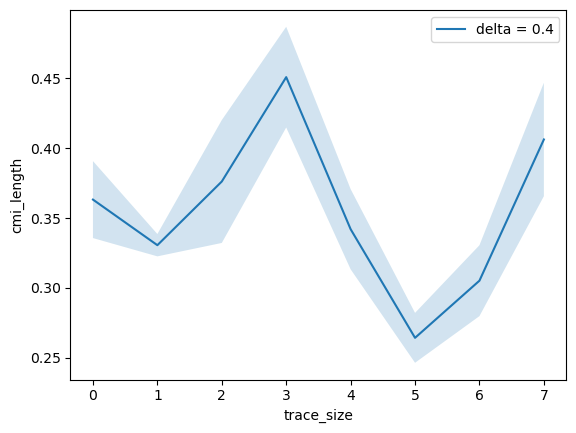

2
[0.47773331196655283, 0.4154869116474467, 0.46409385716426205, 0.5903356631539067, 0.4728356469318172, 0.3602454607165405, 0.41901448114138146, 0.5935489402100397]


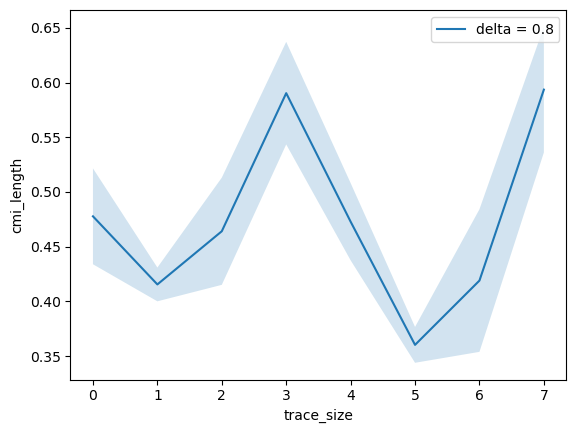

3
[0.5848535208615433, 0.5018325372946074, 0.537830471307894, 0.7210352616103558, 0.6031743709406131, 0.4593608666129407, 0.5233596158030297, 0.8002215078348883]


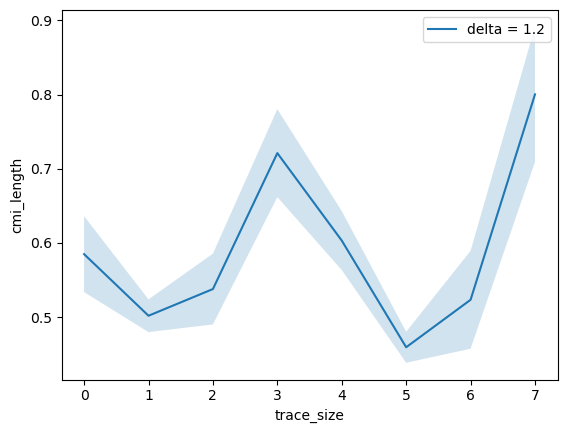

4
[0.6080190428580591, 0.5200962435016606, 0.5463445959067862, 0.7411391450732916, 0.6253051593591202, 0.4837429249624596, 0.5449503922735988, 0.8339853961449362]


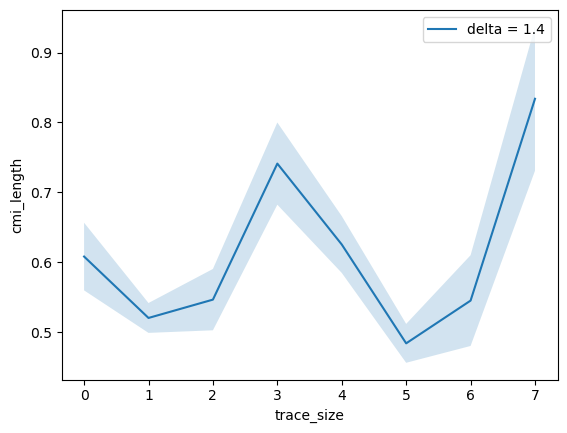

5
[0.5937218256089828, 0.5060619282864894, 0.5249483556951562, 0.7127692166111856, 0.605179477831184, 0.4758431838114319, 0.5343300096357242, 0.8028560893751919]


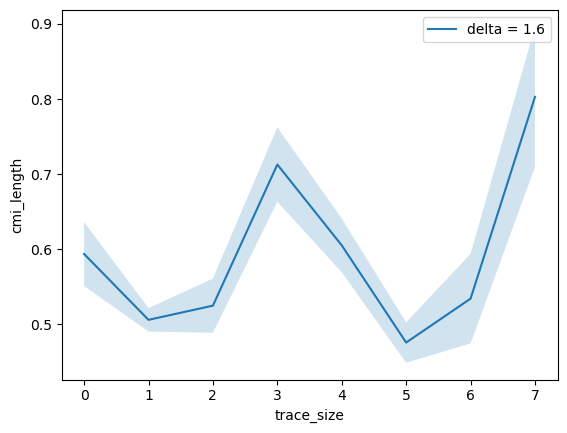

6
[0.5555010274298766, 0.47183346904375006, 0.48669643449025185, 0.6592217723894725, 0.564155533786256, 0.44825112530591577, 0.5036063598159601, 0.7455124475802928]


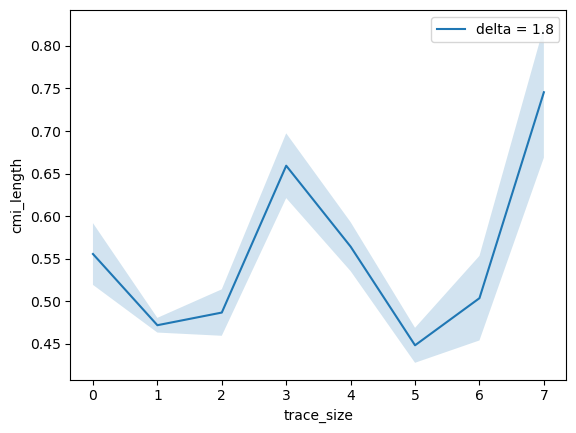

7
[0.5121891533065065, 0.43397915078388183, 0.44676486521627384, 0.6037869759945987, 0.520270218170432, 0.4163656222506644, 0.46756838219167257, 0.6885472637322896]


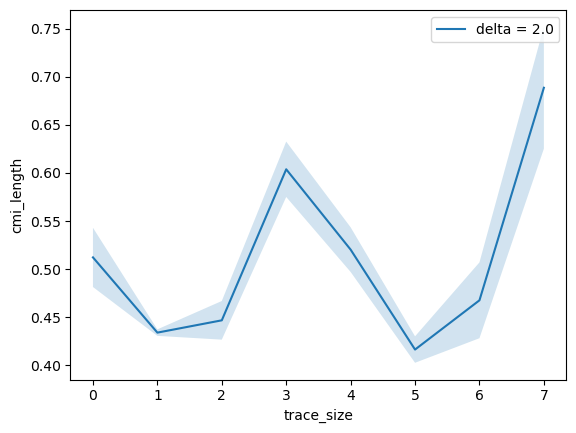

8
[0.4725270150382846, 0.39989161385249933, 0.41156106853663516, 0.5549205556721496, 0.4803559487223164, 0.3867953413395532, 0.43369344507638313, 0.6390032312462559]


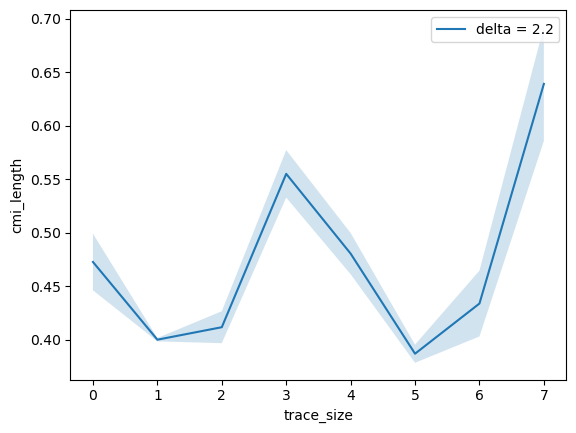

9
[0.4387339778442205, 0.3711798244972804, 0.38224483751848787, 0.5140120321327386, 0.44614580697099687, 0.36123461591722184, 0.4043027780012275, 0.5974450758783412]


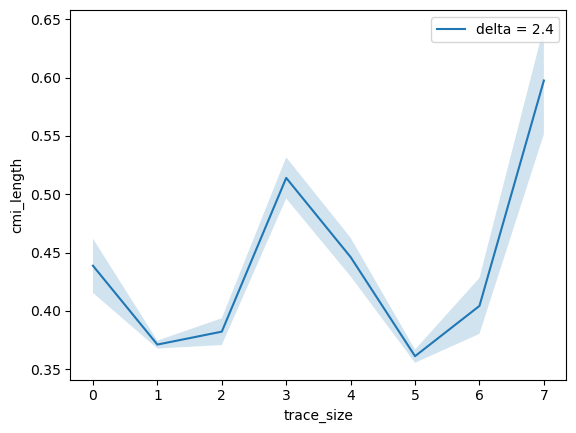

10
[0.38769921632808374, 0.32814611108185965, 0.3387567634144672, 0.453015543255101, 0.39388948113655115, 0.3217497438930347, 0.3591829758227148, 0.5347737880624327]


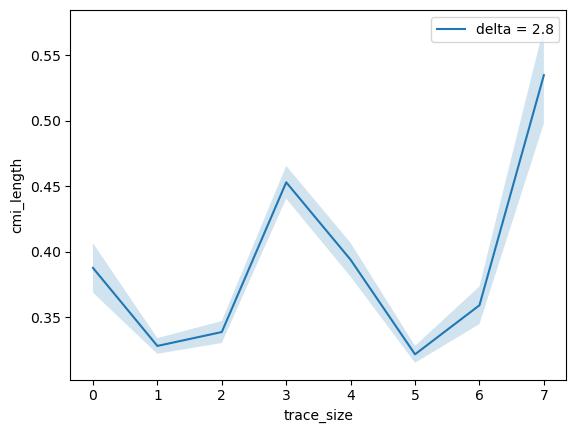

11
[0.35355459455558497, 0.2993456550321622, 0.31000277111760355, 0.4124925739520062, 0.35825511829473766, 0.29440520483435706, 0.328495646702829, 0.4924752477699458]


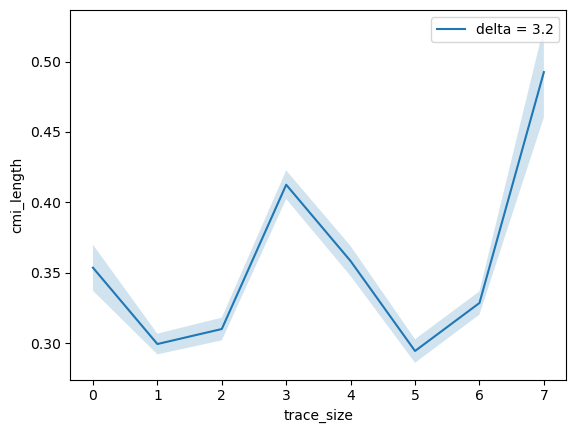

12
[0.3309805390218116, 0.2801819893584936, 0.2911958539679244, 0.3854540884530785, 0.33391525174953907, 0.27555247347741474, 0.30779992614834184, 0.46386316064348954]


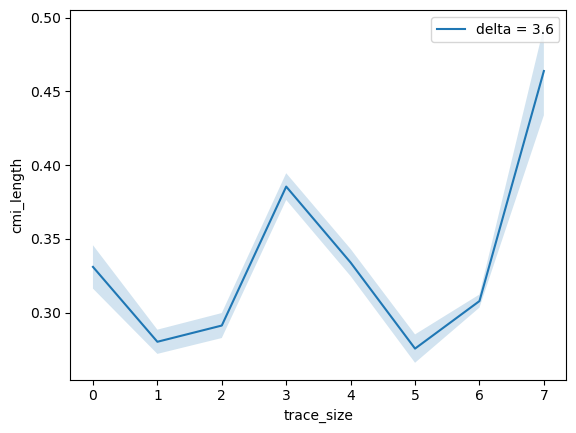

<Figure size 640x480 with 0 Axes>

In [5]:
for i in range(len(params)):
    print(i)
    print(cmi_length_traceout[i])
    if len(cmi_length_traceout[i])>=3:
        cmi_length_traceout[i] = np.array(cmi_length_traceout[i])
        err_cmi_length_traceout[i] = np.array(err_cmi_length_traceout[i]).ravel()
        plt.plot(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(params[i]))
        plt.fill_between(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i] - err_cmi_length_traceout[i],
                         cmi_length_traceout[i] + err_cmi_length_traceout[i], alpha=0.2)
        plt.xlabel("trace_size")
        plt.ylabel("cmi_length")
        plt.legend()
        plt.savefig(
            "figure/"+model+"/traceout/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(params[i]) + "periodic_" + str(
                periodic) + ".png")
        plt.show()
        plt.clf()